# Simple Moving Average (SMA) vs. Exponentially Weighted Moving Average (EMWA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
plt.rcParams['font.size'] = 20

In [3]:
data = pd.read_csv('airline_passengers.csv', index_col='Month')
data.dropna(inplace=True)
data.index = pd.to_datetime(data.index)

In [4]:
data.describe()

,Thousands of Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [5]:
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

## SMA

Weakness of SMA:

* Smaller windows will lead to more noise, rather than signal
* It will always lag by the size of the window
* It will never reach to full peak or valley of the data due to the averaging.
* Does not really inform you about possible future behaviour, all it really does is describe trends in your data.
* Extreme historical values can skew your SMA significantly

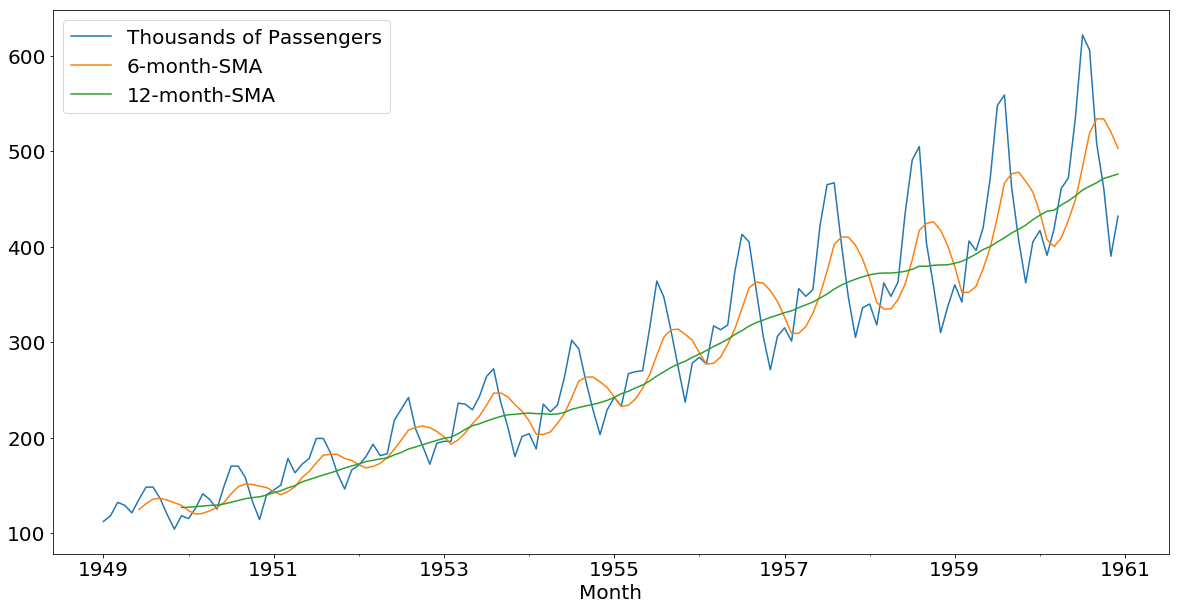

In [8]:
data['6-month-SMA'] = data['Thousands of Passengers'].rolling(6).mean()
data['12-month-SMA'] = data['Thousands of Passengers'].rolling(12).mean()

data.plot(
    figsize=(20, 10)
);

## EMWA

Reduces the lag effect from SMA and puts more weight on recent values. The amount of weight applied depends on the parameters used in the EMWA and the window size. More details [here](https://pandas.pydata.org/pandas-docs/stable/computation.html#exponentially-weighted-windows).

$$ y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$$ 

where $ x_t $ is the input value, $ w_i $ is the applied weight ($ i = 0 $ to $ t $), and $ y_t $ is the output.

$$ y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t} $$ 

when ```adjust=True``` in the Pandas in-built ```ewm``` function. 

When ```adjust=False```, moving averages are calculated as:

\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,
\end{split}

which is equivalent to using weights:

\begin{split}w_i = \begin{cases}
    \alpha (1 - \alpha)^i & \text{if } i < t \\
    (1 - \alpha)^i        & \text{if } i = t
\end{cases}\end{split}

#### Alpha

\begin{split}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{for span}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{for center of mass}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{for half-life}\ h > 0
 \end{cases}\end{split}

* Span corresponds to what is commonly called an “N-day EW moving average”.
* Center of mass has a more physical interpretation and can be thought of in terms of span: c=(s−1)/2
* Half-life is the period of time for the exponential weight to reduce to one half.
* Alpha specifies the smoothing factor directly.

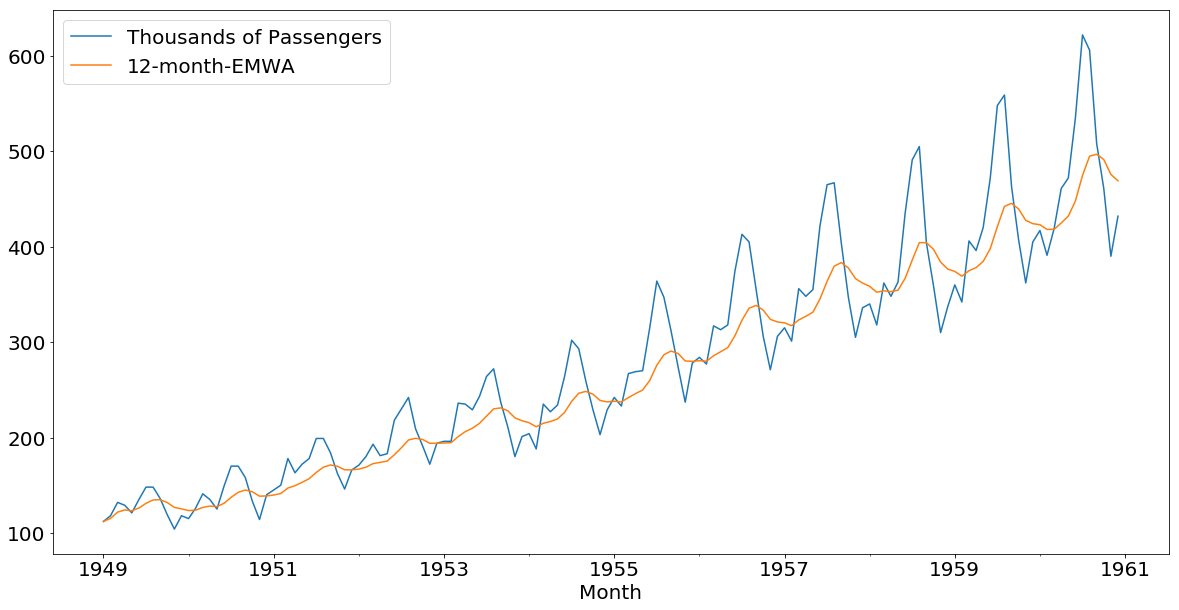

In [10]:
data['12-month-EMWA'] = data['Thousands of Passengers'].ewm(span=12).mean()

data[[
    'Thousands of Passengers',
    '12-month-EMWA'
]].plot(figsize=(20, 10));